# Linear Regression


In [1]:
# notebook magic to display plots
%matplotlib inline
# notebook magic to auto reload imported modules when changes are made to them 
%load_ext autoreload
%autoreload 2

In [170]:
import matplotlib.pyplot as plt
import sys
sys.path.append('/vagrant/data-science-from-scratch/code/')
import working_with_data as wwd
import lab5
import lab5regression
from lab5 import load_ad_data
import gradientdescent as gd

## Loading the dataset

Let's look at data about sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [179]:
# let's load the data
data = load_ad_data()
print 'Dataset columns:', ','.join(data[0].keys())

Dataset columns: TV,Newspaper,Radio,Sales,Row


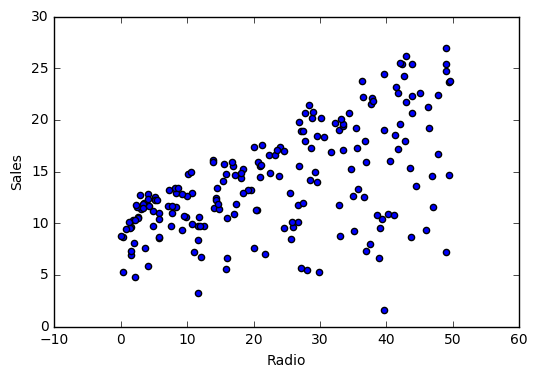

In [174]:
tv = wwd.pluck('TV', data)
newspaper = wwd.pluck('Newspaper', data)
radio = wwd.pluck('Radio', data)
sales = wwd.pluck('Sales', data)

plt.scatter(radio, sales)
plt.xlabel('Radio')
plt.ylabel('Sales')

## Linear Regression

In [175]:
import sklearn
import pandas as pd
from sklearn.linear_model import LinearRegression

In [180]:
lm = LinearRegression()

In [188]:
X = pd.DataFrame({'newspaper': newspaper})
X.head()


,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4


In [189]:
lm.fit(X, sales)

def getCoefficients(X, lm):
    names = ['Intercept'] + list(X.columns)
    coeffs = [lm.intercept_] + list(lm.coef_)
    return pd.DataFrame({'names': names, 'estimatedCoefficients': coeffs})

getCoefficients(X, lm)

,estimatedCoefficients,names
0,12.351407,Intercept
1,0.054693,newspaper


In [191]:
X = pd.DataFrame({"TV": tv, "Radio": radio, "Newspaper": newspaper})
X.head()

,Newspaper,Radio,TV
0,69.2,37.8,230.1
1,45.1,39.3,44.5
2,69.3,45.9,17.2
3,58.5,41.3,151.5
4,58.4,10.8,180.8


In [192]:
lm.fit(X, sales)
getCoefficients(X, lm)

,estimatedCoefficients,names
0,2.938889,Intercept
1,-0.001037,Newspaper
2,0.188530,Radio
3,0.045765,TV


## Bootstrap sampling

In [195]:
from multiple_regression import p_value
from lab5regression import prepare_data, run_linear_regression, boot

data = prepare_data(X, sales)
betas = run_linear_regression(data)
names = ['Intercept'] + list(X.columns)
sdevs = boot(data, run_linear_regression, trials=1000, print_info=False)

for i in range(len(betas)):
    beta_i = betas[i]
    name = names[i]
    sd_i = sdevs[i]
    pval =  p_value(beta_i, sd_i)
    print "Beta for", name, "is", beta_i, "with SD", sd_i, " pval", pval

Beta for Intercept is 2.93888936946 with SD 0.341587897258  pval 0.0
Beta for Newspaper is -0.00103749304248 with SD 0.00647421445108  pval 0.872684122479
Beta for Radio is 0.188530016918 with SD 0.0110977165427  pval 0.0
Beta for TV is 0.0457646454554 with SD 0.00193104668619  pval 0.0


In [196]:
2.93888936946/ 0.341587897258

8.603610938944563